In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import ml_development as ml
import warnings
warnings.filterwarnings('ignore')

In [9]:
filtered_df = pd.read_csv("filtered_df.csv")
filtered_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,8.597482,8.342125,5.590987,5.888878,1.0,Urban,Y


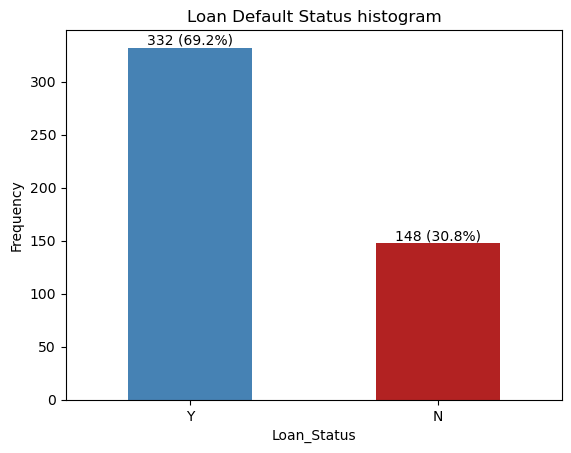

In [5]:
ml.checking_class_imbalance(filtered_df, 'Loan_Status', 'Loan Default Status histogram')

In [7]:
#what percentae 
# Group by 'sex' and 'married', and count 'default' occurrences
result = filtered_df.groupby(['Gender', 'Married']).agg(total_default=('Loan_Status', lambda x: (x == 'N').sum())).reset_index()
# Calculate the total defaults for all groups
total_defaults = result['total_default'].sum()
# Calculate the percentage of defaults for each group
result['percentage'] = round(result['total_default'] / total_defaults * 100, 2)
result

,Gender,Married,total_default,percentage
0,Female,No,24,16.22
1,Female,Yes,8,5.41
2,Male,No,40,27.03
3,Male,Yes,76,51.35


In [11]:
result_ = filtered_df.groupby(['Gender', 'Married', 'Dependents']).agg(total_default=('Loan_Status', lambda x: (x == 'N').sum())).reset_index()
# Calculate the total defaults for all groups
total_defaults = result['total_default'].sum()
# Calculate the percentage of defaults for each group
result_['percentage'] = round(result_['total_default'] / total_defaults * 100, 2)
result_

,Gender,Married,Dependents,total_default,percentage
0,Female,No,0,18,12.16
1,Female,No,1,5,3.38
2,Female,No,2,1,0.68
3,Female,No,3+,0,0.00
4,Female,Yes,0,6,4.05
5,Female,Yes,1,1,0.68
6,Female,Yes,2,1,0.68
7,Male,No,0,34,22.97
8,Male,No,1,3,2.03
9,Male,No,2,2,1.35


Unmarried Male with no dependant has a significantly high probability of default 